In [23]:
# import bs4
import requests
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import style
import matplotlib.pyplot as plt
import pandas_datareader.data as web
# from bs4 import BeautifulSoup

# We want to download the stock data somewhere first. In this example we are getting stock data from yahoo finance.

In [24]:
style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2020,3,1)
df = web.DataReader('AAPL','yahoo', start, end)

In [25]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,3.470226
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,3.177650
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,3.224152
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.945139
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,3.084645
...,...,...,...,...,...,...
2020-02-24,304.179993,289.230011,297.260010,298.179993,55548800.0,298.179993
2020-02-25,302.529999,286.130005,300.950012,288.079987,57668400.0,288.079987
2020-02-26,297.880005,286.500000,286.529999,292.649994,49513700.0,292.649994


In [26]:
style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2020,3,1)
df = web.DataReader('TSLA','yahoo', start, end)

# Now we want to look at Tesla's stock data, because trading Tesla is way more fun :)

In [27]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2020-02-24,863.500000,822.200012,839.000000,833.789978,15192200,833.789978
2020-02-25,856.599976,787.000000,849.000000,799.909973,17290500,799.909973
2020-02-26,813.309998,776.109985,782.500000,778.799988,14085500,778.799988


In [28]:
df_stats = df.describe()
df_stats

,High,Low,Open,Close,Volume,Adj Close
count,2434.000000,2434.000000,2434.000000,2434.000000,2.434000e+03,2434.000000
mean,194.338250,187.270115,190.820760,190.929626,5.706418e+06,190.929626
std,132.606832,127.043675,129.684319,129.908525,5.324302e+06,129.908525
min,16.629999,14.980000,16.139999,15.800000,1.185000e+05,15.800000
25%,34.985000,33.799999,34.469999,34.430000,1.946775e+06,34.430000
50%,217.645004,209.589996,213.930000,214.040001,4.623550e+06,214.040001
75%,272.867508,264.647499,268.972504,268.697510,7.444250e+06,268.697510
max,968.989990,901.020020,923.500000,917.419983,6.093880e+07,917.419983


# Data that we get from yahoo for free is not as good as the other data that you actually buy from data providers, so in this example we'll simply work on the closing price of the stock.

In [29]:
daily_close = df['Close']
daily_close

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2020-02-24    833.789978
2020-02-25    799.909973
2020-02-26    778.799988
2020-02-27    679.000000
2020-02-28    667.989990
Name: Close, Length: 2434, dtype: float64

In [30]:
daily_close.shape

(2434,)

In [31]:
daily_close[0]

23.889999389648438

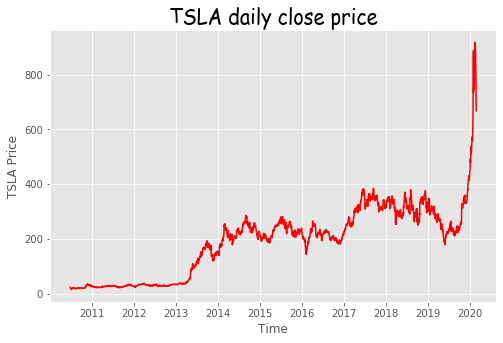

In [32]:
plt.figure(figsize=(8,5))
plt.xlabel('Time')
plt.ylabel('TSLA Price')
plt.title('TSLA daily close price', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.plot(daily_close, 'r', label='TSLA close')

# From the graph and stock closing price series above, we know that if you hold TSLA stock from its IPO till now, you would have earn almost 30 times the money you invested as the price increased from 23.8999 to 667.98999. But what's a reason not to do so?

In [33]:
high_watermark = 0
max_drawdown = 0
cur_maxdd = 0
high_watermark_dt = 0
dd_start = 0
dd_end = 0
for i in range(daily_close.size):
    if daily_close[i]>= high_watermark:
        high_watermark = daily_close[i]
        high_watermark_dt = df.index[i]
    cur_maxdd = (high_watermark -daily_close[i])/high_watermark
    if cur_maxdd > max_drawdown:
        max_drawdown = cur_maxdd
        dd_start = high_watermark_dt
        dd_end = df.index[i]
print('the max drawdown of tsla stock is:', max_drawdown)
print('the drawdown starts at', dd_start, ',ends at', dd_end)

the max drawdown of tsla stock is: 0.5351428539721996
the drawdown starts at 2017-09-18 00:00:00 ,ends at 2019-06-03 00:00:00


In [34]:
tsla_drawdown = web.DataReader('TSLA','yahoo', dd_start, dd_end)

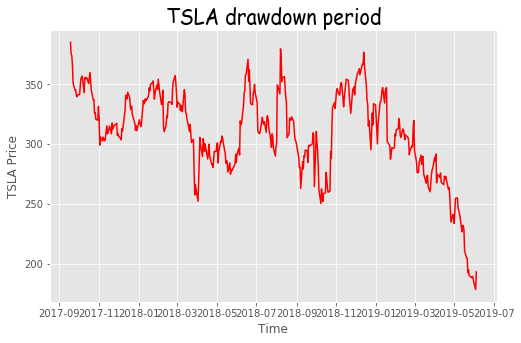

In [35]:
plt.figure(figsize=(8,5))
plt.xlabel('Time')
plt.ylabel('TSLA Price')
plt.title('TSLA drawdown period', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.plot(tsla_drawdown['Close'], 'r', label='TSLA drawdown')

# A good way to protect your capital from this is to have a portfolio and actively adjust it, like a Hedgefund does, but let's suppose that you are a die-hard TSLA trader so it makes strategy development in this example a bit simpler :)

In [39]:
df['SMA_50'] = df['Close'].rolling(50).mean()
df['SMA_200'] = df['Close'].rolling(200).mean()
previous_50 = df['SMA_50'].shift(1)
previous_200 = df['SMA_200'].shift(1)
df['SMA_diff'] = df['SMA_200'] - df['SMA_50']

crossing = (((df['SMA_50'] <= df['SMA_200']) & (previous_50 >= previous_200)) 
            | ((df['SMA_50'] >= df['SMA_200']) & (previous_50 <= previous_200)))

np.where(crossing == True)

(array([ 294,  342,  510,  625, 1142, 1244, 1356, 1470, 1516, 1526, 1579,
        1659, 1878, 2038, 2065, 2123, 2181, 2355]),)

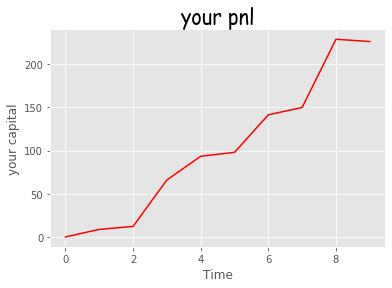

In [40]:
cashes = [0]
cash = 0
position = 0
for cross_point in np.where(crossing == True)[0]:    
    # if SMA_200 > SMA_10, buy. otherwise, sell.
    signal = np.sign(df['SMA_diff'].iloc[cross_point])
    
    cash += -1*(signal*df['Close'].iloc[cross_point])
    position += signal
    
    if position == 0:
        cashes.append(cash)
    
cashes = pd.Series(cashes)
    
plt.xlabel('Time')
plt.ylabel('your capital')
plt.title('your pnl', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.plot(cashes, 'r', label='your pnl')

# Now we have a strategy that renders a much more smoother pnl curve!

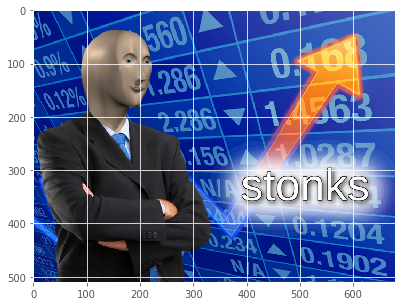

In [41]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,5))
img = mpimg.imread('stonks_man.png') 
plt.imshow(img) 